# ESA June 2024 IGCSE Exam Analysis

In [8]:
# Import all necessary libraries
import pandas as pd

# Change any duplicated grades to single grades
def convert_duplicated_grades(grade):
    if pd.isna(grade):
        return grade  # Leave NaN values as is
    if grade == 'A*A*':
        return 'A*'
    if grade == 'AA':
        return 'A'
    elif grade == 'BB':
        return 'B'
    elif grade == 'CC':
        return 'C'
    elif grade == 'DD':
        return 'D'
    elif grade == 'EE':
        return 'E'
    elif grade == 'FF':
        return 'F'
    elif grade == 'GG':
        return 'G'
    elif grade == 'XX' or grade == 'X':
        return ''
    else:
        return grade
    
# Load CSV file with the igcse results
igcse_results_path = 'input_files/igcse_2024_analysis.csv'
igcse_results = pd.read_csv(igcse_results_path)

# Covert all duplicated grades to single grades
for col in igcse_results.columns:
    igcse_results[col] = igcse_results[col].apply(convert_duplicated_grades)

# Save the cleaned data to a new CSV file
igcse_results.to_csv('output_files/igcse_2024_cleaned.csv', index=False)
print('The cleaned data has been saved to output_files/igcse_2024_cleaned.csv')

The cleaned data has been saved to output_files/igcse_2024_cleaned.csv


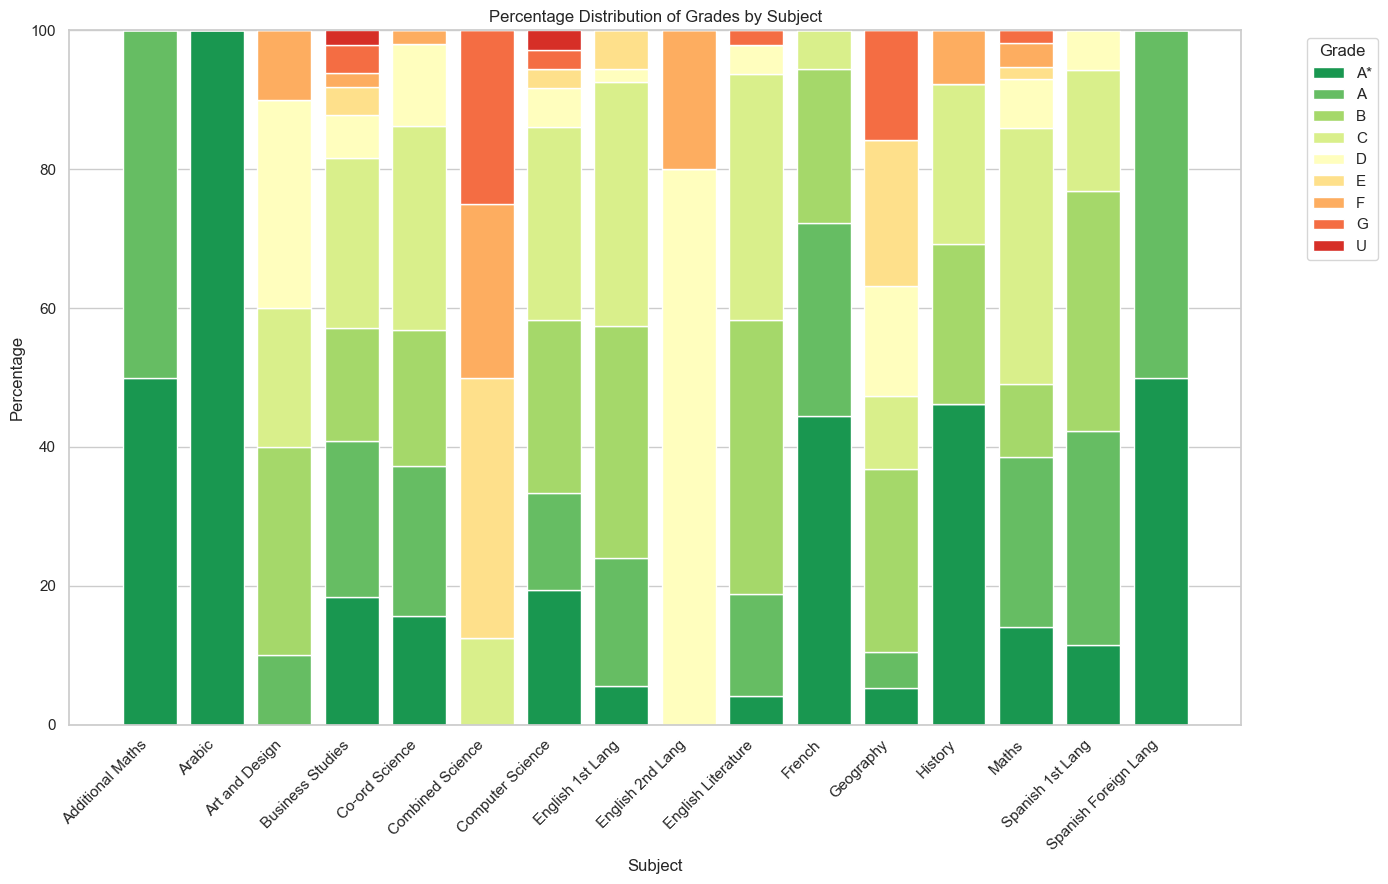

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'output_files/igcse_2024_cleaned.csv'
new_data = pd.read_csv(file_path)

# Transforming the data to a long format
new_long_format_data = new_data.melt(var_name='Subject', value_name='Grade')

# Dropping any NaN values, as they represent missing grades
new_long_format_data = new_long_format_data.dropna()

# Calculating the percentage of each grade within each subject
new_subject_grade_counts = new_long_format_data.groupby(['Subject', 'Grade']).size().unstack().fillna(0)
new_subject_grade_percentages = new_subject_grade_counts.div(new_subject_grade_counts.sum(axis=1), axis=0) * 100

# Reordering the columns to ensure 'A*' comes first
grade_order = ['A*', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'U']  # Add or remove grades as necessary
new_subject_grade_percentages= new_subject_grade_percentages[grade_order]

# Choosing a less intense color palette
palette = sns.color_palette("RdYlGn_r", len(grade_order)) 

# Plotting with Matplotlib using Seaborn's style
plt.figure(figsize=(14, 9))
bottom_val = None

# Iterate through each grade level to stack the bars
for grade in new_subject_grade_percentages.columns:
    plt.bar(new_subject_grade_percentages.index, 
            new_subject_grade_percentages[grade], 
            bottom=bottom_val, label=grade, color=palette[grade_order.index(grade)])
    
    if bottom_val is None:
        bottom_val = new_subject_grade_percentages[grade]
    else:
        bottom_val += new_subject_grade_percentages[grade]

# Adding labels, title, and legend
plt.xlabel('Subject')
plt.ylabel('Percentage')
plt.title('Percentage Distribution of Grades by Subject')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Grade', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the stacked bar chart
plt.tight_layout()
plt.show()


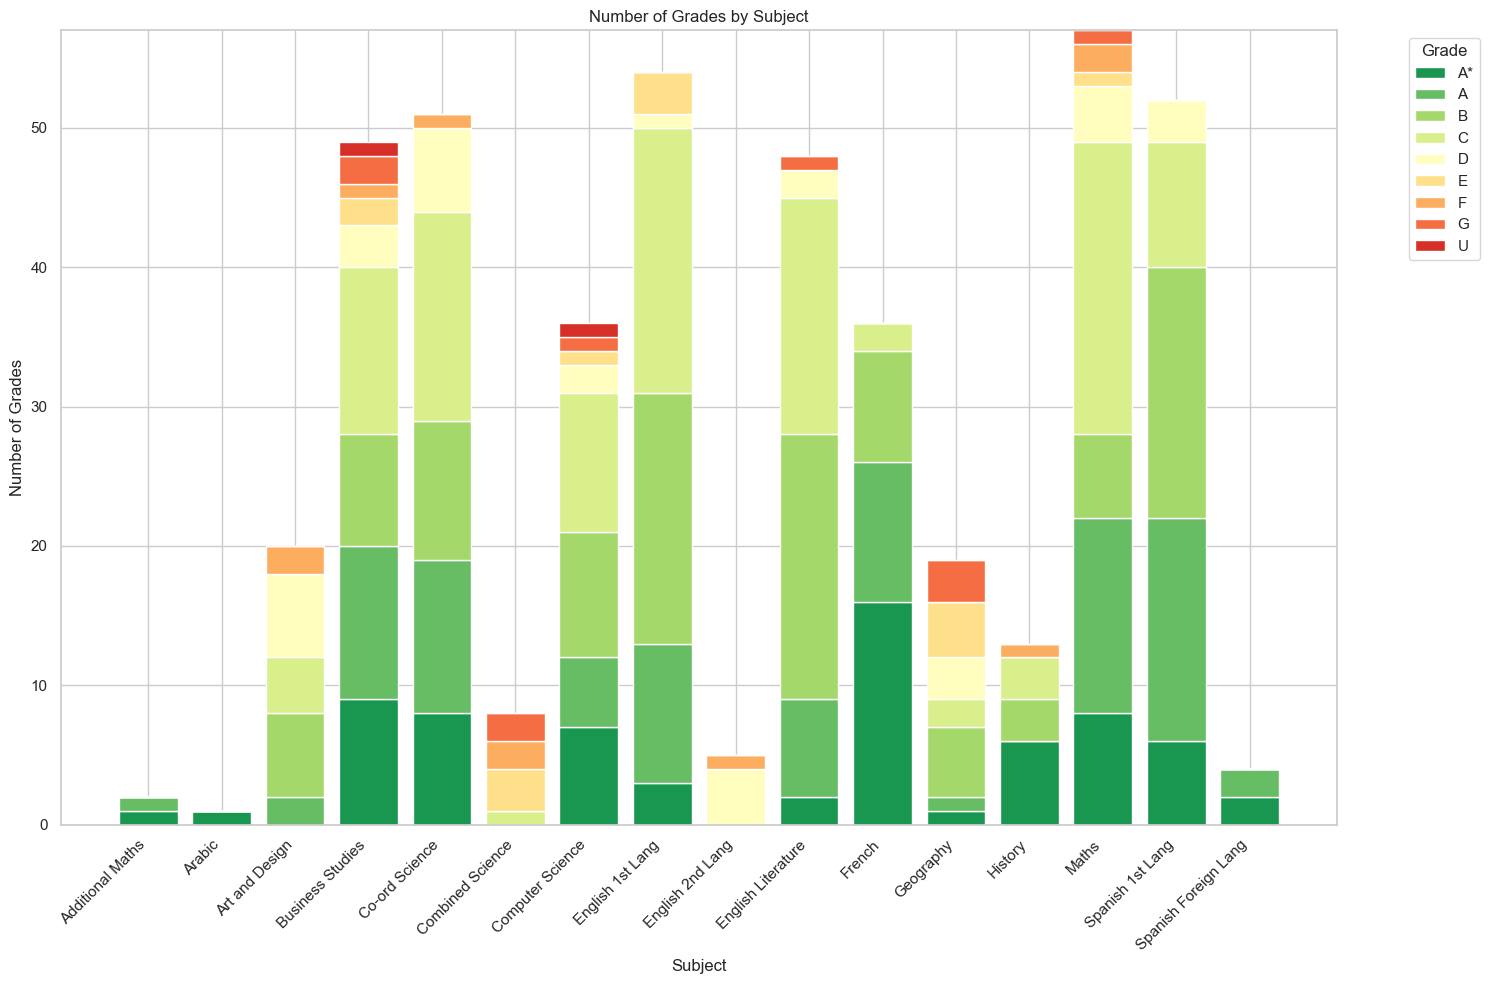

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'output_files/igcse_2024_cleaned.csv'
new_data = pd.read_csv(file_path)

# Transforming the data to a long format
new_long_format_data = new_data.melt(var_name='Subject', value_name='Grade')

# Dropping any NaN values, as they represent missing grades
new_long_format_data = new_long_format_data.dropna()

# Calculating the count of each grade within each subject
new_subject_grade_counts = new_long_format_data.groupby(['Subject', 'Grade']).size().unstack().fillna(0)

# Reordering the columns to ensure 'A*' comes first, and ignoring 'X' grades
grade_order = ['A*', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'U']  # Exclude 'X' from this list
new_subject_grade_counts = new_subject_grade_counts[grade_order]

# Choosing a green to red color palette by reversing 'RdYlGn'
palette = sns.color_palette("RdYlGn_r", len(grade_order))  # Green to red gradient

# Plotting with the new color palette
plt.figure(figsize=(15, 10))
bottom_val = None

for grade in new_subject_grade_counts.columns:
    plt.bar(new_subject_grade_counts.index, 
            new_subject_grade_counts[grade], 
            bottom=bottom_val, label=grade, color=palette[grade_order.index(grade)])
    if bottom_val is None:
        bottom_val = new_subject_grade_counts[grade]
    else:
        bottom_val += new_subject_grade_counts[grade]

plt.xlabel('Subject')
plt.ylabel('Number of Grades')
plt.title('Number of Grades by Subject')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Grade', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [11]:
# Melt the data to have a long format where each grade is a separate row
grades_melted = igcse_results.melt(var_name='Subject', value_name='Grade')

# Remove NaN values
grades_melted = grades_melted.dropna()

# Define the pass and fail grades
pass_grades = ['A*', 'A', 'B', 'C']
fail_grades = ['D', 'E', 'F', 'G', 'X', 'U']

# Calculate the percentage of passes and fails per subject
subject_pass_fail = grades_melted.groupby('Subject').apply(
    lambda x: pd.Series({
        'Total Grades': len(x),
        'Passes': x['Grade'].isin(pass_grades).sum(),
        'Fails': x['Grade'].isin(fail_grades).sum()
    })
)

# Calculate the percentage for passes and fails
subject_pass_fail['Pass Percentage'] = (subject_pass_fail['Passes'] / subject_pass_fail['Total Grades']).round(3)
subject_pass_fail['Fail Percentage'] = (subject_pass_fail['Fails'] / subject_pass_fail['Total Grades']).round(3)

# Sort the table by Fail Percentage in descending order
subject_pass_fail_sorted = subject_pass_fail.sort_values(by='Fail Percentage', ascending=False)

# Save the sorted table to a CSV file
subject_pass_fail_sorted.to_csv('output_files/igcse_2024_pass_fail_analysis.csv')

## Visualise the data using the Seaborn library

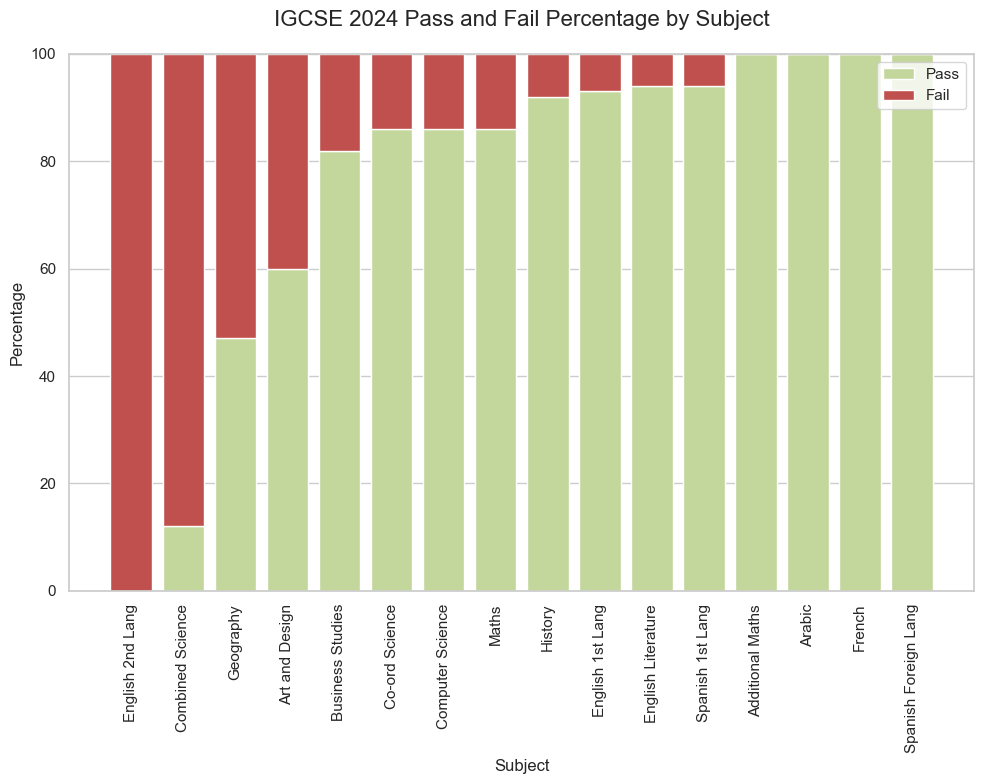

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'output_files/igcse_2024_pass_fail_analysis.csv'
data = pd.read_csv(file_path)

# Sorting the data by Fail Percentage
data_sorted_by_fails = data.sort_values('Fail Percentage', ascending=False)

# Plotting the stacked bar chart using matplotlib with seaborn aesthetics
plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")

# Creating the first bar (for Pass Percentage)
plt.bar(data_sorted_by_fails['Subject'], data_sorted_by_fails['Pass Percentage'], label='Pass', color='#C3D69B')

# Creating the second bar (for Fail Percentage), stacked on top of the Pass Percentage
plt.bar(data_sorted_by_fails['Subject'], data_sorted_by_fails['Fail Percentage'], 
        bottom=data_sorted_by_fails['Pass Percentage'], label='Fail', color='#C0504D')

# Adding labels and title
plt.xlabel('Subject')
plt.ylabel('Percentage')
plt.title('IGCSE 2024 Pass and Fail Percentage by Subject', pad=20, fontsize=16)
plt.xticks(rotation=90)
plt.legend()

# Display the chart
plt.tight_layout()
plt.show()

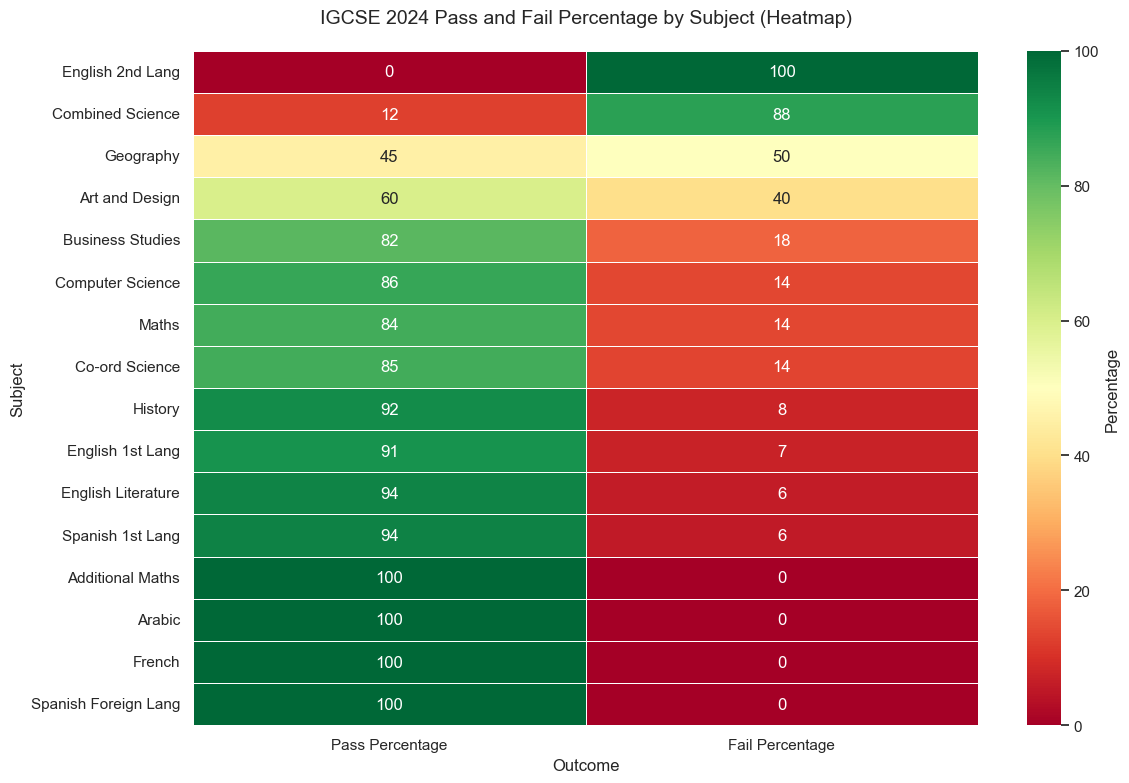

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'output_files/igcse_2024_pass_fail_analysis.csv'
data = pd.read_csv(file_path)

# Sorting the data by Fail Percentage
data_sorted_by_fails = data.sort_values('Fail Percentage', ascending=False)

# Preparing the data for the heatmap
heatmap_data = data_sorted_by_fails[['Subject', 'Pass Percentage', 'Fail Percentage']]
heatmap_data.set_index('Subject', inplace=True)

# Converting the decimal values to percentages
heatmap_data_percentage = heatmap_data * 100

# Plotting the heatmap using seaborn with formatted percentages
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_percentage, annot=True, fmt=".0f", cmap='RdYlGn', cbar_kws={'label': 'Percentage'}, linewidths=0.5)

# Adding labels and title
plt.xlabel('Outcome')
plt.ylabel('Subject')
plt.title('IGCSE 2024 Pass and Fail Percentage by Subject (Heatmap)', pad=20, fontsize=14)

# Display the heatmap
plt.tight_layout()
plt.show()